# Best Area to Open Restaurant in LA

### IBM Coursera Data Science Course-Capstone Project
### Submitted by: Jaiver Lopez

-----

## 1. INTRODUCTION

### BACKGROUND

September 4, 1781 the city of Los Angeles was founded and is one of the most famous places to visit in the world til this day. Most known for Hollywood and its movie production and rich lifestyles. But it is also known to have one of the greatest food cultures there is due to high level of diversity and creativity in this great city. With a population of over 12 million people the city never seems to sleep and always eating. Narrowing down to Downtown Los Angeles can bring lots of opportunity to be apart with the amazing food culture they have here and can bring large amounts of profit to owning your own restaurant. 

With the right square footage of space and location, it can be achieveable. There is so many attractions nearby such as The Staples Center, Civic Center, Fashion District, Hollywood Walk of Fame, and so much more. People are bound to come piling in if done right. There is a lot of traffic that goes through downtown LA. An ideal space to lease would be in the middle of these these attractions or near them. From tourists, it's near a lot of corporate establishments, and of course the locals that will be in and out of this area. 

Ideally with the square footage of an available space would be between 3,500 to 4,500 sqft. 20 USD to 45 USD per square foot depending on exact location. The occupancy amount of people to be allowed in the dining area in the restaurant would be 80 to 100 people. Every 500 square foot is legally able to have up to 33 occupants and this leaves additional space for the kitchen, office, and work stations.    

###  BUSINESS PROBLEM

The issue here would be finding the best location offering with the right amount of square footage in the downtown area of Los Angeles. Limited spaces would be available. Also spaces that can pass inspections and retain licenses that are needed in order to operate in Los Angeles County. To get the proper funding for marketing to be able to compete with other restaurants in the area. To get upscale and proper equipment to produce a easy workflow for the restaurant.  

### TARGET AUDIENCE 

Investors and Beneficairaies who know the downtown Los Angeles area. For those who can give the proper funding to the restaurant. Also have expertise in the food indusrty.

## 2. DATA SOURCES

### ONLINE SCRAPING

Los Angeles postal codes, and location names. LA-based datasets will have different column naming and arrangement. HTML table location of Postal Codes and figures are ordered differently within the webpage. As such, some changes in API parameters and Pandas are needed to create and clean the dataframes.

### GEOGRAPHICAL COORDINATES

Use Los Angeles Geo-coordinates. After researching, a consolidated csv will be created. Latitude and longitude coordnates will be merged

### SPACES FOR LEASE DATA

The Foursquare API will be used to collect available space based on the geo-coordinates of the area. Folium library to visualize location data

In [21]:
#Importing required libraries
import numpy as np
import pandas as pd

try:
    from geopy.geocoders import Nominatim
except:
    !pip install geopy
    from geopy.geocoders import Nominatim
    
try:
    import geocoder
except:
    !pip install geocoder
    import geocoder


import requests
from bs4 import BeautifulSoup

try:
    import folium
except:
    !pip install folium
    import folium
    
from sklearn.cluster import KMeans

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

import matplotlib as mpl
import matplotlib.pyplot as plt

In [22]:
# install wordcloud
!pip install wordcloud
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [23]:
#Getting the location of Downtown city using the geocoder package
g = geocoder.arcgis('Downtown, Los Angeles, CA, USA')
blr_lat = g.latlng[0]
blr_lng = g.latlng[1]
print("The Latitude and Longitude of Downtown, Los Angeles is {} and {}".format(blr_lat, blr_lng))

The Latitude and Longitude of Downtown, Los Angeles is 34.04834000000005 and -118.25563999999997


In [24]:
#Scraping the Wikimedia webpage for list of localities present in Downtown city
neig = requests.get("https://commons.wikimedia.org/wiki/Category:Downtown_Los_Angeles").text

In [25]:
#parsing the scraped content
soup = BeautifulSoup(neig, 'html.parser')

In [26]:
#Creating a list to store neighborhood data
neighborhoodlist = []

In [27]:
#Searching the localities using class labels and appending it to the neighborhood list
for i in soup.find_all('div', class_='mw-category')[0].find_all('a'):
    neighborhoodlist.append(i.text)

#Creating a dataframe from the list
neig_df = pd.DataFrame({"Locality": neighborhoodlist})
neig_df.head()

Locality
0   Buildings in Downtown Los Angeles
1           Civic Center, Los Angeles
2  Cityscapes of Downtown Los Angeles
3            2nd Street (Los Angeles)
4            7th Street (Los Angeles)

In [28]:
#Shape of dataframe neig_df
neig_df.shape

(36, 1)

## Getting Locations of locality

In [29]:
#Defining a function to get the location of the localities
def get_location(localities):
    g = geocoder.arcgis('{}, Downtown, Los Angeles, CA, USA'.format(localities))
    get_latlng = g.latlng
    return get_latlng

In [30]:
#Creating an empty list
co_ordinates = []
#Getting the co-ordinates of each locality using the function defined above
for i in neig_df["Locality"].tolist():
    co_ordinates.append(get_location(i))
print(co_ordinates)

[[34.04834000000005, -118.25563999999997], [34.049810000000036, -118.25423999999998], [34.04834000000005, -118.25563999999997], [34.04761068868174, -118.23919738262944], [34.035055365901535, -118.23865050352609], [34.05361000000005, -118.24549999999999], [34.04953000000006, -118.25946999999996], [34.029611060101715, -118.23039991834902], [34.05095000000006, -118.24978999999996], [32.77013654426631, -117.0158613607412], [34.03704887185317, -118.26120133862237], [34.05361000000005, -118.24549999999999], [34.04747000000003, -118.26428999999996], [34.031409782457864, -118.24453716298852], [34.04834000000005, -118.25563999999997], [34.05295029612485, -118.25649909972765], [34.04792000000003, -118.25800999999996], [34.047120000000064, -118.25707999999997], [34.05192931726763, -118.25220941922373], [34.05551000000003, -118.24550999999997], [34.04792000000003, -118.25800999999996], [34.05361000000005, -118.24549999999999], [34.05361000000005, -118.24549999999999], [34.04834000000005, -118.2556

In [31]:
co_ordinates[:5]

[[34.04834000000005, -118.25563999999997],
 [34.049810000000036, -118.25423999999998],
 [34.04834000000005, -118.25563999999997],
 [34.04761068868174, -118.23919738262944],
 [34.035055365901535, -118.23865050352609]]

In [32]:
#Creating a dataframe from the list of location co-ordinates
co_ordinates_df = pd.DataFrame(co_ordinates, columns=['Latitudes', 'Longitudes'])

In [33]:
#Adding co-ordinates of localities to neig_df dataframe
neig_df["Latitudes"] = co_ordinates_df["Latitudes"]
neig_df["Longitudes"] = co_ordinates_df["Longitudes"]

In [34]:
print("The shape of neig_df is {}".format(neig_df.shape))
neig_df.head()

The shape of neig_df is (36, 3)


Locality  Latitudes  Longitudes
0   Buildings in Downtown Los Angeles  34.048340 -118.255640
1           Civic Center, Los Angeles  34.049810 -118.254240
2  Cityscapes of Downtown Los Angeles  34.048340 -118.255640
3            2nd Street (Los Angeles)  34.047611 -118.239197
4            7th Street (Los Angeles)  34.035055 -118.238651

## Plotting the Localities on map

In [35]:
#Creating a map
blr_map = folium.Map(location=[blr_lat, blr_lng],zoom_start=11)

#adding markers to the map for localities
#marker for Downtown
folium.Marker([blr_lat, blr_lng], popup='<i>Downtown</i>', color='red', tooltip="Click to see").add_to(blr_map)

#markers for localities
for latitude,longitude,name in zip(neig_df["Latitudes"], neig_df["Longitudes"], neig_df["Locality"]):
    folium.CircleMarker(
        [latitude, longitude],
        radius=6,
        color='blue',
        popup=name,
        fill=True,
        fill_color='#3186ff'
    ).add_to(blr_map)

blr_map

## Using Foursquare API to explore the localities

In [36]:
#Foursquare Credentials
CLIENT_ID = 'PJ1BWNXTSEA1EN0DKYLQBR1OKNZJV1X0RDX3MMCKYWUIDMIF'
CLIENT_SECRET = 'CULSFCMTRJMK4TR5GFL5GRUQWOB51RUAQDTESNPBY0HPLUOB'
VERSION = '20180605' # Foursquare API version

In [37]:
#Getting the top 100 venues in each locality
radius = 2000
LIMIT = 100

venues = []

for lat, lng, locality in zip(neig_df["Latitudes"], neig_df["Longitudes"], neig_df["Locality"]):
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, radius, LIMIT)
    results = requests.get(url).json()['response']['groups'][0]['items']

    for venue in results:
        venues.append((locality, lat, lng, venue['venue']['name'], venue['venue']['location']['lat'], venue['venue']['location']['lng'], venue['venue']['categories'][0]['name'], venue['venue']['id']))

In [38]:
#Looking at the first venue
venues[0]

('Buildings in Downtown Los Angeles',
 34.04834000000005,
 -118.25563999999997,
 'Los Angeles Athletic Club',
 34.04650829642701,
 -118.25531646206136,
 'Gym',
 '4a0f961df964a52077761fe3')

In [39]:
#Convert the venue list into dataframe
venues_df = pd.DataFrame(venues)
venues_df.columns = ['Locality', 'Latitude', 'Longitude', 'Venue name', 'Venue Lat', 'Venue Lng', 'Venue Category', 'Venue ID']
venues_df.head()

Locality  Latitude  Longitude  \
0  Buildings in Downtown Los Angeles  34.04834 -118.25564   
1  Buildings in Downtown Los Angeles  34.04834 -118.25564   
2  Buildings in Downtown Los Angeles  34.04834 -118.25564   
3  Buildings in Downtown Los Angeles  34.04834 -118.25564   
4  Buildings in Downtown Los Angeles  34.04834 -118.25564   

                    Venue name  Venue Lat   Venue Lng      Venue Category  \
0    Los Angeles Athletic Club  34.046508 -118.255316                 Gym   
1              The Water Grill  34.049137 -118.255049  Seafood Restaurant   
2  The NoMad Hotel Los Angeles  34.047021 -118.255441               Hotel   
3                    SUGARFISH  34.047460 -118.256747    Sushi Restaurant   
4                Bottega Louie  34.047197 -118.256603  Italian Restaurant   

                   Venue ID  
0  4a0f961df964a52077761fe3  
1  4a5bfb78f964a52018bc1fe3  
2  584c5cdfd772f952a50c6aef  
3  4c85b026d4e23704454e8588  
4  49e25d07f964a5200f621fe3

In [40]:
venues_df.shape

(3600, 8)

In [42]:
#Getting the list of all the categories of all the restaurant present in venues_df dataframe
res_df = pd.DataFrame({'Venue Category': venues_df['Venue Category'], 'Strength': venues_df['Venue Category']})
res_df = res_df.groupby(['Venue Category']).count()
res_df = res_df.sort_values(['Strength'], ascending=False)
print(res_df.head())
print("We can see that most restaurants belongs to Coffe Shop category i.e. {}".format(res_df['Strength'][0]))

                  Strength
Venue Category            
Coffee Shop            312
Bar                    126
Sushi Restaurant       116
Hotel                  105
Theater                100
We can see that most restaurants belongs to Coffe Shop category i.e. 312


In [43]:
res_df.shape

(160, 1)

In [44]:
demo1_df = pd.DataFrame({'Venue Category':res_df.index[:50]})
category_strength=[]
for i in range(50):
    category_strength.append(res_df['Strength'][i])
demo2_df = pd.DataFrame(category_strength, columns=['Strength'])
demo_df = pd.DataFrame({'Venue Category': demo1_df['Venue Category'], 'Strength': demo2_df['Strength']})
demo_df.head()

Venue Category  Strength
0       Coffee Shop       312
1               Bar       126
2  Sushi Restaurant       116
3             Hotel       105
4           Theater       100

In [45]:
word_string = ''
for i in range(50):
    tmp = demo_df['Venue Category'][i]
    if len(tmp.split(' ')) == 1:
        word_string = word_string + (tmp + ' ')*demo_df['Strength'][i]
    else:
        part = tmp.split(' ')
        tmp = part[0]+'_'+part[1]
        word_string = word_string + (tmp + ' ')*demo_df['Strength'][i]

Word cloud created!


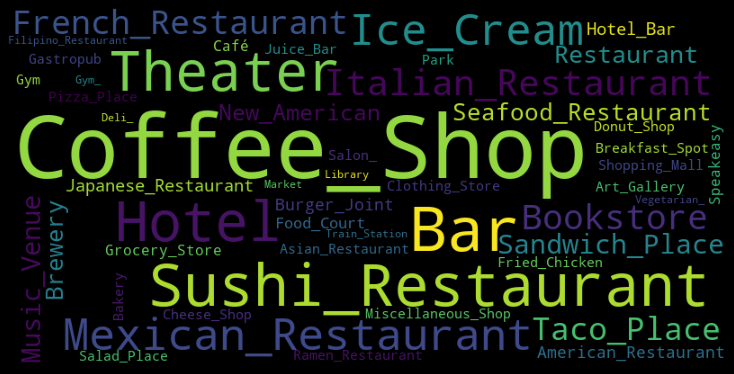

In [46]:
wordcloud = WordCloud(width=800, height=400, collocations=False).generate(word_string)
print('Word cloud created!')
# Open a plot of the generated image.

plt.figure( figsize=(10,9), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [47]:
#List of 50 most common categories of restuarants in Downtown City
cat_res_list = res_df.index[0:50]
cat_res_list

Index(['Coffee Shop', 'Bar', 'Sushi Restaurant', 'Hotel', 'Theater',
       'Mexican Restaurant', 'Ice Cream Shop', 'Italian Restaurant',
       'Bookstore', 'French Restaurant', 'Taco Place', 'Sandwich Place',
       'Music Venue', 'Restaurant', 'Seafood Restaurant', 'Brewery',
       'New American Restaurant', 'Japanese Restaurant', 'Hotel Bar',
       'Burger Joint', 'American Restaurant', 'Food Court', 'Grocery Store',
       'Café', 'Speakeasy', 'Bakery', 'Park', 'Gastropub', 'Pizza Place',
       'Art Gallery', 'Gym', 'Breakfast Spot', 'Asian Restaurant',
       'Clothing Store', 'Salad Place', 'Fried Chicken Joint', 'Donut Shop',
       'Juice Bar', 'Ramen Restaurant', 'Shopping Mall', 'Cheese Shop',
       'Salon / Barbershop', 'Miscellaneous Shop', 'Filipino Restaurant',
       'Library', 'Market', 'Vegetarian / Vegan Restaurant', 'Train Station',
       'Deli / Bodega', 'Gym / Fitness Center'],
      dtype='object', name='Venue Category')

In [49]:
#creating a dataframe from the list of common categories created above
venue_etables = venues_df[venues_df['Venue Category'].isin(['Coffee Shop', 'Bar', 'Sushi Restaurant', 'Hotel', 'Theater',
       'Mexican Restaurant', 'Ice Cream Shop', 'Italian Restaurant',
       'Bookstore', 'French Restaurant', 'Taco Place', 'Sandwich Place',
       'Music Venue', 'Restaurant', 'Seafood Restaurant', 'Brewery',
       'New American Restaurant', 'Japanese Restaurant', 'Hotel Bar',
       'Burger Joint', 'American Restaurant', 'Food Court', 'Grocery Store',
       'Café', 'Speakeasy', 'Bakery', 'Park', 'Gastropub', 'Pizza Place',
       'Art Gallery', 'Gym', 'Breakfast Spot', 'Asian Restaurant',
       'Clothing Store', 'Salad Place', 'Fried Chicken Joint', 'Donut Shop',
       'Juice Bar', 'Ramen Restaurant', 'Shopping Mall', 'Cheese Shop',
       'Salon / Barbershop', 'Miscellaneous Shop', 'Filipino Restaurant',
       'Library', 'Market', 'Vegetarian / Vegan Restaurant', 'Train Station',
       'Deli / Bodega', 'Gym / Fitness Center'])]

## Analyzing the Localities according to the venues

In [68]:
#creating one hot encoding
blr_onehot = pd.get_dummies(venues_df[['Venue Category']], prefix="", prefix_sep="")

blr_onehot['Locality'] = venues_df['Locality']

#moving the locality column to the front
blr_onehot = blr_onehot[ [ 'Locality' ] + [ col for col in blr_onehot.columns if col!='Locality' ] ]
blr_onehot.head()


Locality  American Restaurant  Antique Shop  \
0  Buildings in Downtown Los Angeles                    0             0   
1  Buildings in Downtown Los Angeles                    0             0   
2  Buildings in Downtown Los Angeles                    0             0   
3  Buildings in Downtown Los Angeles                    0             0   
4  Buildings in Downtown Los Angeles                    0             0   

   Arcade  Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0       0            0           0                    0                 0   
1       0            0           0                    0                 0   
2       0            0           0                    0                 0   
3       0            0           0                    0                 0   
4       0            0           0                    0                 0   

   BBQ Joint  Bagel Shop  ...  Trail  Train Station  Udon Restaurant  \
0          0           0  ...      0              0                0   
1          0           0  ...      0              0                0   
2          0           0  ...      0              0                0   
3          0           0  ...      0              0                0   
4          0           0  ...      0              0                0   

   Vegetarian / Vegan Restaurant  Video Game Store  Vietnamese Restaurant  \
0                              0                 0                      0   
1                              0                 0                      0   
2                              0                 0                      0   
3                              0                 0                      0   
4                              0                 0                      0   

   Warehouse Store  Wine Bar  Wine Shop  Yoga Studio  
0                0         0          0            0  
1                0         0          0            0  
2                0         0          0            0  
3                0         0          0            0  
4                0         0          0            0  

[5 rows x 161 columns]

#### Grouping the categories

In [69]:
blr_grouped = blr_onehot.groupby(['Locality']).mean().reset_index()
print(blr_grouped.shape)
blr_grouped.head()

(36, 161)


Locality  American Restaurant  \
0  2012 Los Angeles Kings Stanley Cup parade                 0.01   
1  2014 Los Angeles Kings Stanley Cup parade                 0.01   
2                   2nd Street (Los Angeles)                 0.02   
3                   7th Street (Los Angeles)                 0.01   
4       7th Street Station-Metro Silver Line                 0.01   

   Antique Shop  Arcade  Art Gallery  Art Museum  Arts & Crafts Store  \
0           0.0     0.0         0.01        0.01                 0.00   
1           0.0     0.0         0.01        0.01                 0.00   
2           0.0     0.0         0.04        0.01                 0.00   
3           0.0     0.0         0.05        0.00                 0.01   
4           0.0     0.0         0.01        0.01                 0.00   

   Asian Restaurant  BBQ Joint  Bagel Shop  ...  Trail  Train Station  \
0              0.00       0.01         0.0  ...    0.0           0.01   
1              0.00       0.01         0.0  ...    0.0           0.01   
2              0.00       0.01         0.0  ...    0.0           0.01   
3              0.01       0.00         0.0  ...    0.0           0.00   
4              0.00       0.01         0.0  ...    0.0           0.01   

   Udon Restaurant  Vegetarian / Vegan Restaurant  Video Game Store  \
0             0.01                           0.00               0.0   
1             0.01                           0.00               0.0   
2             0.01                           0.01               0.0   
3             0.01                           0.01               0.0   
4             0.01                           0.00               0.0   

   Vietnamese Restaurant  Warehouse Store  Wine Bar  Wine Shop  Yoga Studio  
0                    0.0              0.0      0.00       0.00          0.0  
1                    0.0              0.0      0.00       0.00          0.0  
2                    0.0              0.0      0.00       0.00          0.0  
3                    0.0              0.0      0.01       0.02          0.0  
4                    0.0              0.0      0.00       0.00          0.0  

[5 rows x 161 columns]

#### Supposing we want to open an italian restaurants

In [70]:
#numbers of localities having Italian Restaurants
len(blr_grouped[blr_grouped['Italian Restaurant'] > 0])

36

In [71]:
blr_italian = blr_grouped[['Locality', 'Italian Restaurant']]
blr_italian.head()

Locality  Italian Restaurant
0  2012 Los Angeles Kings Stanley Cup parade                0.02
1  2014 Los Angeles Kings Stanley Cup parade                0.02
2                   2nd Street (Los Angeles)                0.04
3                   7th Street (Los Angeles)                0.05
4       7th Street Station-Metro Silver Line                0.02

In [72]:
#Creating a map
blr_map = folium.Map(location=[blr_lat, blr_lng],zoom_start=11)

#adding markers to the map for localities
#marker for Bangalore
folium.Marker([blr_lat, blr_lng], popup='<i>Downtown</i>', color='red', tooltip="Click to see").add_to(blr_map)

#markers for localities
for latitude,longitude,name,strength in zip(neig_df["Latitudes"], neig_df["Longitudes"], neig_df["Locality"], blr_italian["Italian Restaurant"]):
    folium.CircleMarker(
        [latitude, longitude],
        radius=strength*300,
        color='green',
        popup=name,
        fill=True,
        fill_color='#3186ff'
    ).add_to(blr_map)

blr_map

## Clustering The Localities

Using K-means clustering for clustering the locality in Downtown base on the density of Italian restaurants present in each locality by using the above dataframe created.

In [73]:
#K-means clustering
cluster = 3 

#Dataframe for clustering
blr_clustering = blr_italian.drop(['Locality'], 1)

#run K-means clustering
k_means = KMeans(init="k-means++", n_clusters=cluster, n_init=12).fit(blr_clustering)

#getting the labels for first 10 locality 
print(k_means.labels_[0:10])


[1 1 0 2 1 1 0 0 2 0]


In [74]:
#Creating a copy of blr_italian dataframe
blr_labels = blr_italian.copy()

#adding label to blr_labels
blr_labels["Cluster Label"] = k_means.labels_

blr_labels.head()

Locality  Italian Restaurant  \
0  2012 Los Angeles Kings Stanley Cup parade                0.02   
1  2014 Los Angeles Kings Stanley Cup parade                0.02   
2                   2nd Street (Los Angeles)                0.04   
3                   7th Street (Los Angeles)                0.05   
4       7th Street Station-Metro Silver Line                0.02   

   Cluster Label  
0              1  
1              1  
2              0  
3              2  
4              1

In [75]:
#Merging the blr_labels and neig_df dataframes to get the latitude and longitudes for each locality
blr_labels = blr_labels.join(neig_df.set_index('Locality'), on='Locality')
blr_labels.head()

Locality  Italian Restaurant  \
0  2012 Los Angeles Kings Stanley Cup parade                0.02   
1  2014 Los Angeles Kings Stanley Cup parade                0.02   
2                   2nd Street (Los Angeles)                0.04   
3                   7th Street (Los Angeles)                0.05   
4       7th Street Station-Metro Silver Line                0.02   

   Cluster Label  Latitudes  Longitudes  
0              1  34.053610 -118.245500  
1              1  34.053610 -118.245500  
2              0  34.047611 -118.239197  
3              2  34.035055 -118.238651  
4              1  34.053610 -118.245500

In [76]:
#Grouping the localities according to their Cluster Labels
blr_labels.sort_values(["Cluster Label"], inplace=True)
blr_labels.head()

Locality  Italian Restaurant  Cluster Label  Latitudes  \
9        Broadway (Los Angeles)                0.03              0  34.037049   
34  Spring Street (Los Angeles)                0.04              0  34.043782   
15    Civic Center, Los Angeles                0.03              0  34.049810   
26     Los Angeles Music Center                0.03              0  34.057350   
7                 Angels Flight                0.03              0  34.050950   

    Longitudes  
9  -118.261201  
34 -118.253023  
15 -118.254240  
26 -118.248160  
7  -118.249790

In [77]:
#Cleaning the dataframe for mapping the localities according to their cluster labels
blr_only_labels = blr_labels.drop(columns=['Italian Restaurant','Latitudes','Longitudes'])
blr_only_labels.head()

Locality  Cluster Label
9        Broadway (Los Angeles)              0
34  Spring Street (Los Angeles)              0
15    Civic Center, Los Angeles              0
26     Los Angeles Music Center              0
7                 Angels Flight              0

In [78]:
#Plot the cluster on map
cluster_map = folium.Map(location=[blr_lat, blr_lng],zoom_start=11)

#marker for Bangalore
folium.Marker([blr_lat, blr_lng], popup='<i>Downtown</i>', color='red', tooltip="Click to see").add_to(cluster_map)

#Getting the colors for the clusters
col = ['red', 'green', 'blue']

#markers for localities
for latitude,longitude,name,clus in zip(blr_labels["Latitudes"], blr_labels["Longitudes"], blr_labels["Locality"], blr_labels["Cluster Label"]):
    label = folium.Popup(name + ' - Cluster ' + str(clus+1))
    folium.CircleMarker(
        [latitude, longitude],
        radius=6,
        color=col[clus],
        popup=label,
        fill=False,
        fill_color=col[clus],
        fill_opacity=0.3
    ).add_to(cluster_map)
       
cluster_map

## Analyzing The Cluster

In [79]:
#Cluster 1
#Dataframe containing localities with cluster label 0, which corresponds to localities with no Italian Restaurant
cluster_1 = blr_labels[blr_labels['Cluster Label'] == 0]
print("There are {} localities in cluster-1".format(cluster_1.shape[0]))
mean_presence_1 = cluster_1['Italian Restaurant'].mean()
print("The mean occurence of Italian restaurant in cluster-1 is {0:.2f}".format(mean_presence_1))
cluster_1.head()

There are 10 localities in cluster-1
The mean occurence of Italian restaurant in cluster-1 is 0.03


Locality  Italian Restaurant  Cluster Label  Latitudes  \
9        Broadway (Los Angeles)                0.03              0  34.037049   
34  Spring Street (Los Angeles)                0.04              0  34.043782   
15    Civic Center, Los Angeles                0.03              0  34.049810   
26     Los Angeles Music Center                0.03              0  34.057350   
7                 Angels Flight                0.03              0  34.050950   

    Longitudes  
9  -118.261201  
34 -118.253023  
15 -118.254240  
26 -118.248160  
7  -118.249790

In [80]:
#Cluster 2
#Dataframe containing localities with cluster label 1, which corresponds to localities with high density of Italian Restaurant
cluster_2 = blr_labels[blr_labels['Cluster Label'] == 1]
print("There are {} localities in cluster-2".format(cluster_2.shape[0]))
mean_presence_2 = cluster_2['Italian Restaurant'].mean()
print("The mean occurence of Italian restaurant in cluster-2 is {0:.2f}".format(mean_presence_2))
cluster_2.head()

There are 22 localities in cluster-2
The mean occurence of Italian restaurant in cluster-2 is 0.02


Locality  Italian Restaurant  Cluster Label  Latitudes  \
28                One Wilshire                0.02              1   34.04791   
21                  Grand Park                0.02              1   34.05551   
27                   Metro 417                0.02              1   34.04834   
32                   Selig Zoo                0.02              1   34.04834   
25  Los Angeles Center Studios                0.01              1   34.04481   

    Longitudes  
28  -118.25554  
21  -118.24551  
27  -118.25564  
32  -118.25564  
25  -118.37139

In [81]:
#Cluster 3
#Dataframe containing localities with cluster label 2, which corresponds to localities with low density of Italian Restaurant
cluster_3 = blr_labels[blr_labels['Cluster Label'] == 2]
print("There are {} localities in cluster-3".format(cluster_3.shape[0]))
mean_presence_3 = cluster_3['Italian Restaurant'].mean()
print("The mean occurence of Italian restaurant in cluster-3 is {0:.2f}".format(mean_presence_3))
cluster_3.head()

There are 4 localities in cluster-3
The mean occurence of Italian restaurant in cluster-3 is 0.05


Locality  Italian Restaurant  Cluster Label  \
13      Central Avenue (Los Angeles)                0.05              2   
8    Bill Keene Memorial Interchange                0.06              2   
31  Pico (Los Angeles Metro station)                0.05              2   
3           7th Street (Los Angeles)                0.05              2   

    Latitudes  Longitudes  
13  34.031410 -118.244537  
8   32.770137 -117.015861  
31  34.031055 -118.250008  
3   34.035055 -118.238651

## Conclusion

As can be seen from the map , opening an italian restaurant in cluster 2 with mean italian restaurant being the lowest 
and the prominent localities being the highest , would be a good area to open an italian restaurant in downtown , los angeles